In [1]:
import os
import sys
import glob
import copy
import datetime
import platform

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tqdm import tqdm_notebook

In [2]:
_ = "F:\\YandexDisk\\3.Programing\\"
PACK_DIR = _ + "myPacks\\"
PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
sys.path.append(PACK_DIR)
from PRAO import *

In [3]:
head, main_pulse, data_pulses, back = read_profiles('171118_1133+16_00_profiles.txt')

In [7]:
print(
    len(main_pulse),
    len(data_pulses[0]),
    head['numpointwin'],
    int(float(head['period'])/(float(head['tay'])*10**-3)))

570 570 570 966


In [10]:
pattern = np.loadtxt(
    PATTERN_DIR
    + head['name']
    + '_'
    + head['tay']
    + '.csv',  skiprows=4) 

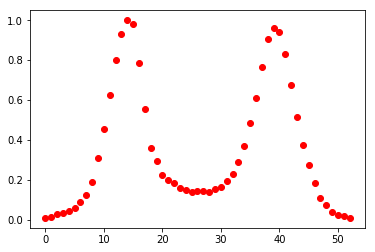

In [11]:
plt.close()
plt.plot(range(len(pattern)), pattern, 'bo', color = 'r')
plt.show()

In [13]:
left_e, right_e = edgesOprofile(main_pulse, pattern)

In [14]:
need_points = int(float(head['period'])/(float(head['tay'])*10**-3)) - len(data_pulses[0])

In [15]:
need_points

396

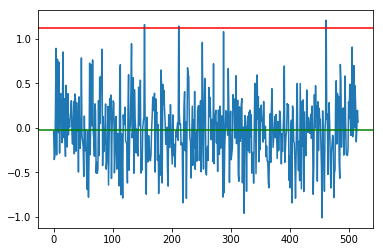

In [23]:
pulse = np.append(data_pulses[0][:left_e], data_pulses[0][right_e:])
plt.close()
plt.plot(pulse)
plt.axhline(np.mean(pulse), color='g')
plt.axhline(3*np.std(pulse), color='r')
plt.show()

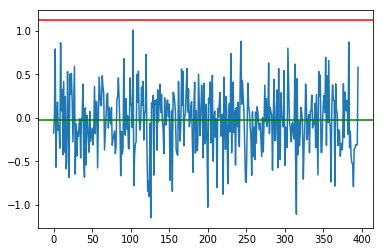

In [24]:
plt.close()
plt.plot(np.random.normal(np.mean(pulse), np.std(pulse), need_points))
plt.axhline(np.mean(pulse), color='g')
plt.axhline(3*np.std(pulse), color='r')
plt.show()

In [47]:
full_obs = []
for i in range(len(data_pulses)):
    noise = np.append(data_pulses[i][:left_e], data_pulses[i][right_e:])
    full_obs.append([])
    full_obs[i] = np.append(
        data_pulses[i],
        np.random.normal(np.mean(noise), np.std(noise), need_points))

In [48]:
non_cor_data = []
for pulse, backg in zip(full_obs, back):
    non_cor_data.append(pulse + backg)

In [49]:
obser = np.hstack(non_cor_data)

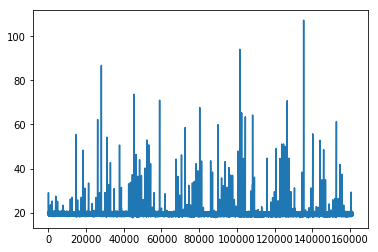

In [50]:
plt.close()
plt.plot(obser)
plt.show()

In [29]:
len(data_pulses[0])

570

In [30]:
a = np.array([1, 2, 3])

In [45]:
np.random.normal(np.mean(noise), np.std(noise), need_points).shape

(396,)

In [44]:
data_pulses.shape

(167, 570)

In [46]:
np.append(data_pulses[0], np.random.normal(np.mean(noise), np.std(noise), need_points))

array([-4.11500000e-02, -3.54750000e-01, -3.19950000e-01,  1.74550000e-01,
        8.94350000e-01, -3.02450000e-01,  7.74250000e-01,  7.63950000e-01,
       -5.23500000e-02,  7.38950000e-01, -2.82350000e-01,  3.58650000e-01,
        3.85250000e-01,  1.35750000e-01, -1.65850000e-01,  3.98250000e-01,
        8.53650000e-01, -1.09050000e-01,  3.29050000e-01, -8.62500000e-02,
       -3.17950000e-01,  4.77650000e-01, -2.02350000e-01, -2.13750000e-01,
        3.85650000e-01, -7.67500000e-02,  9.56500000e-02,  8.25000000e-03,
        1.28650000e-01,  1.93950000e-01,  3.06450000e-01, -6.23500000e-02,
       -1.80950000e-01,  4.75500000e-02,  2.97350000e-01, -2.90850000e-01,
        3.82050000e-01,  3.18650000e-01, -2.60950000e-01,  2.83450000e-01,
       -3.31500000e-02,  1.92450000e-01, -4.95250000e-01,  3.49450000e-01,
       -1.51550000e-01, -2.28550000e-01, -2.99500000e-02,  7.86650000e-01,
       -8.96500000e-02, -1.38150000e-01, -2.13950000e-01, -5.45350000e-01,
        1.34150000e-01, -